<center>


# Implementación de PCA


<center>


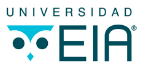


por:

**José Miguel Muñoz**<br>
**Esteban Vásquez**

Ya que vimos qué hay detrás del PCA, e implementamos nuestro propio código, no está mal que por practicidad evaluemos cómo se utiliza. 

A continuación, realizaremos una implementación mediante ScikitLearn [1].

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns; sns.set()
from sklearn import preprocessing
import pylab
import time
#################################
#  La librería que vamos a usar #
#################################
from sklearn.decomposition import PCA

# Utilizando nuestro caso de estudio

In [12]:
#Tomo las columnas numéricas
df=pd.read_excel("/content/0 DatosRiesgoCredito(I).xlsx")[['Edad', 'Estado civil', 'Hijos', 'Estrato', 'Nivel de estudios', 'Ingresos', 'Egresos', 'Califica', 'Puntaje']]
df[["Puntaje"]]=df[["Puntaje"]].dropna()
#Para solucionar el problema de las variables categoricas:
#Para el estado civil:
estado_civil={"Soltero":0,"Casado":1,"Unión Libre":2,"Separado":3,"Viudo": 11}
df[["Estado civil"]]=df[["Estado civil"]].replace(estado_civil)
#Para el nivel de estudios
estudios={"Bachiller":2,"Técnico": 3,"Profesional":5,"Tecnólogo":4,"Primaria":1,"Especializacion":6,"Ninguno": 0}
df[["Nivel de estudios"]]=df[["Nivel de estudios"]].replace(estudios)
#Veamos cómo quedó
df=df.dropna()
df.head(2)

,Edad,Estado civil,Hijos,Estrato,Nivel de estudios,Ingresos,Egresos,Califica,Puntaje
0,22,0,0,2,3,949000,226000,1,27.0
1,57,1,2,4,2,1806000,1319000,1,63.0


In [13]:
# Normalizamos el dataFrame
df_normal=(df-df.mean())/df.std()
df_normal.head()

,Edad,Estado civil,Hijos,Estrato,Nivel de estudios,Ingresos,Egresos,Califica,Puntaje
0,-1.317306,-0.525347,-0.815128,-1.009383,-0.236791,-0.520696,-0.334066,0.489355,-1.212648
1,1.462597,-0.111131,1.755661,0.871740,-0.930251,0.177180,1.243271,0.489355,0.909306
3,-1.237880,-0.525347,-0.815128,-1.009383,-0.236791,-0.818738,-0.599601,0.489355,-1.802080
4,-1.317306,-0.525347,-0.815128,-1.009383,-0.236791,-0.682746,-0.360042,0.489355,-1.625250
5,1.542023,-0.525347,-0.815128,-0.068822,-0.930251,-0.656716,-0.033896,0.489355,0.025159


Por ejemplo, veamos cómo se ven las variables ingresos y egresos de toda la población que tenemos

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


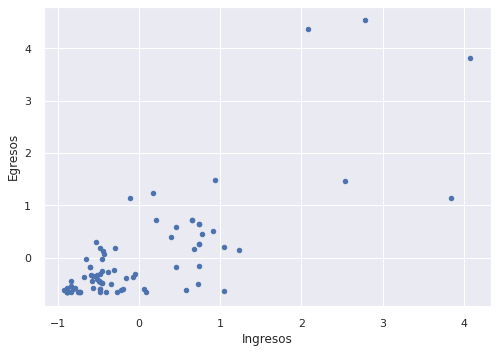

In [14]:
X=df_normal[["Ingresos","Egresos"]]
X.plot.scatter(x="Ingresos",y="Egresos");plt.show()

In [15]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
print(pca.components_)
print("Cada una de nuestros nuevos vectores puede explicar:")
print(pca.explained_variance_)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
Cada una de nuestros nuevos vectores puede explicar:
[1.77751529 0.22248471]


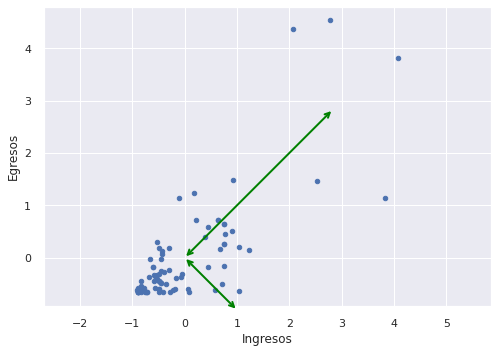

In [17]:
X.plot.scatter(x="Ingresos",y="Egresos",c="b")
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax = None or plt.gca()
    arrowprops=dict(arrowstyle='<->',  linewidth=2, color='green')
    ax.annotate('', pca.mean_, pca.mean_ + v, arrowprops=arrowprops,color='r')
plt.axis('equal');

### Por ejemplo, con la edad y los ingresos



[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
Cada una de nuestros nuevos vectores puede explicar:
[1.33436284 0.66563716]


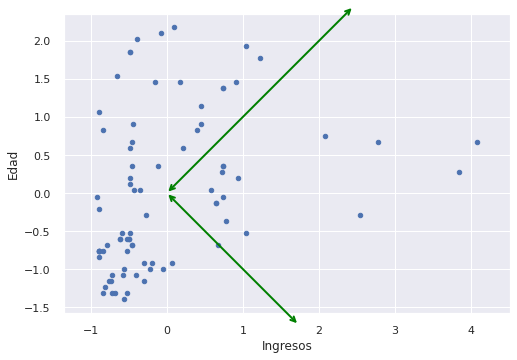

In [18]:
X=df_normal[["Ingresos","Edad"]]
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print("Cada una de nuestros nuevos vectores puede explicar:")
print(pca.explained_variance_)
X.plot.scatter(x="Ingresos",y="Edad",c="b")
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    ax = None or plt.gca()
    arrowprops=dict(arrowstyle='<->',  linewidth=2, color='green')
    ax.annotate('', pca.mean_, pca.mean_ + v, arrowprops=arrowprops,color='r')
plt.axis('equal');

Con todas las variables se obtiene:

### Evaluación del error en la varianza

In [19]:
%%time 
pca = PCA()
pca.fit(df_normal.drop(columns=[df_normal.columns[0],df_normal.columns[1]]))
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

CPU times: user 2.15 ms, sys: 939 µs, total: 3.08 ms
Wall time: 3.04 ms


In [20]:
import plotly.express as px
px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
   height=600,
   width=600,)

# Para reducción de dimensión 

Recordemos que es tomar las componentes principales de menor dimensión (por que no nos importan prácticamente nada). Por ejemplo, para tomar nuestro dataFrame y llevarlo sólo a 4 dimensiones, podemos hacer:

In [21]:
df_reducido=df_normal[["Ingresos","Egresos"]].copy()
pca = PCA(n_components=1)
pca.fit(df_reducido)
df_reducido_numpy = pca.transform(df_reducido)
print("original shape:   ", df_reducido.shape)
print("transformed shape:", df_reducido_numpy.shape)

original shape:    (82, 2)
transformed shape: (82, 1)


In [22]:
pd.DataFrame(df_reducido_numpy).head()

,0
0,-0.604408
1,1.004411
2,-1.002918
3,-0.737363
4,-0.488336


In [23]:
invertido= pca.inverse_transform(df_reducido_numpy)

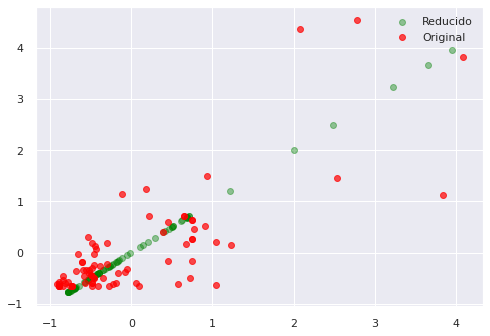

In [24]:
invertido= pd.DataFrame(pca.inverse_transform(df_reducido_numpy))
fig,ax=plt.subplots()
ax.scatter(invertido[0],invertido[1],c="green",alpha=0.4,label="Reducido")
ax.scatter(df_normal["Ingresos"],df_normal["Egresos"],c="red",alpha=0.7,label="Original")
ax.legend();plt.show()

¿Cómo se ve con todas?

Acabamos de condensar dos variables de nuestro dataset en una sola!

## ¿Por qué sólo en 2D?

In [25]:
import plotly.express as px
from sklearn.decomposition import PCA
X = df_normal

pca3d = PCA(n_components=3)
components = pca3d.fit_transform(X)
total_var = pca3d.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df_normal["Puntaje"],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [26]:
n_components=4
pca = PCA()
components = pca.fit_transform(df_normal[['Edad', 'Estado civil', 'Hijos', 'Estrato', 'Nivel de estudios',  'Ingresos', 'Egresos']])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(n_components),
    color=df_normal["Puntaje"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

# Otras opciones para PCA
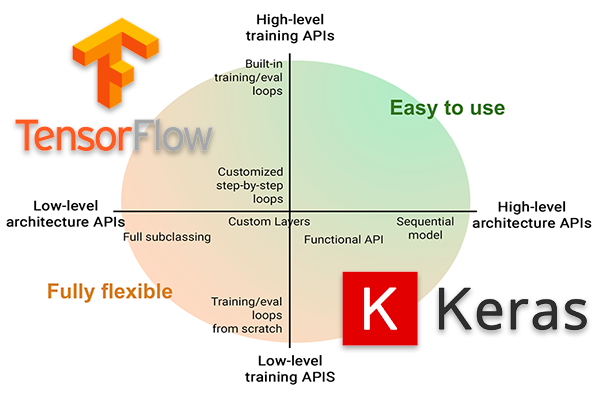

# Otras Modificaiones del PCA

### Kernel PCA

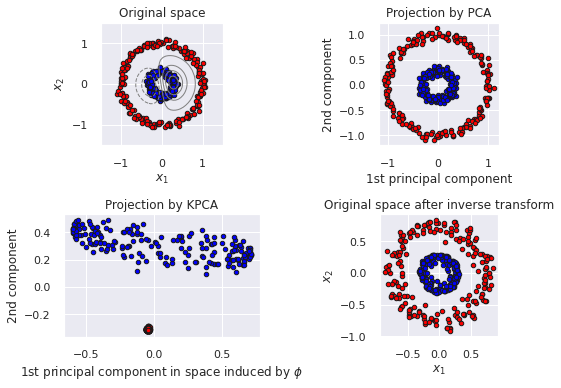

In [27]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()


### Multilinear PCA

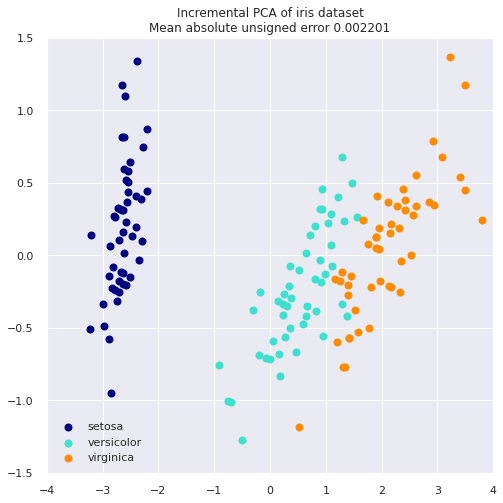

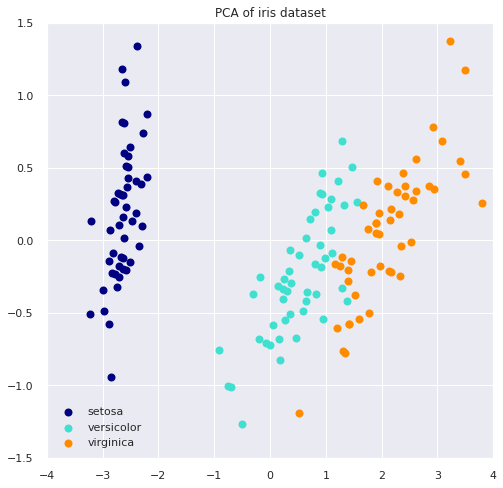

CPU times: user 879 ms, sys: 21.9 ms, total: 901 ms
Wall time: 912 ms


In [28]:
%%time
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['navy', 'turquoise', 'darkorange']

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

### Canonical decomposition


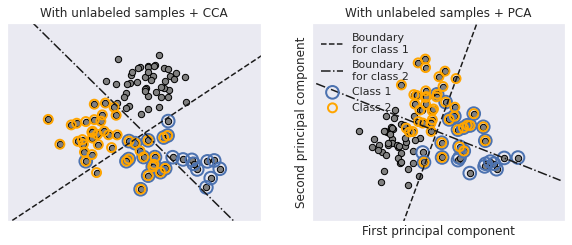

In [29]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
                facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
                facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")


plt.figure(figsize=(10, 8))

X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=True,
                                      random_state=1)

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")


### Referencias

1. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
